In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Arial'


def arkeoplot(file_name):
    with open(file_name, "r") as file:
        lines = file.readlines()
    col_titles_line = None
    for line in lines:
      if "## Data ##" in line:
        col_titles_line = lines[lines.index(line) + 1]
        data_start_index = lines.index(line) + 2
        break

    col_titles = col_titles_line.split("\t")
    last_col = col_titles[-1]
    last_col = last_col.strip()
    col_titles[-1] = last_col
    table = []

    for line in lines[data_start_index:]:
      values = line.split()
      table.append(tuple(values))

    df = pd.DataFrame(table, columns=col_titles)
    df = df.apply(pd.to_numeric)
    df = df.dropna()

    with open(file_name, "r") as file:
        for line in file:
            if line.startswith("## Header ##"):
                line = next(file)
                if line.startswith("[General info]"):
                    User = next(file).strip()
                    Device = next(file).strip()
                    Cell = next(file).strip()
                    Test = next(file).strip()
                    Date = next(file).strip()
                    Time = next(file).strip()
                    Temperature = next(file).strip()
                    User = User.split("\t")[1]
                    Device = Device.split("\t")[1]
                    Cell = Cell.split("\t")[1]
                    Test = Test.split("\t")[1]
                    Date = Date.split("\t")[1]
                    Time = Time.split("\t")[1]
                    Temperature = Temperature.split("\t")[1]
                line = next(file)
                while not line.startswith("[Gate Settings]"):
                    line = next(file)
                if line.startswith("[Gate Settings]"):
                    StartG = next(file).strip()
                    EndG = next(file).strip()
                    StepG = next(file).strip()
                    StartG = StartG.split("\t")[1]
                    EndG = EndG.split("\t")[1]
                    StepG = StepG.split("\t")[1]
                line = next(file)
                while not line.startswith("[Channel Settings]"):
                    line = next(file)
                if line.startswith("[Channel Settings]"):
                    StartC = next(file).strip()
                    EndC = next(file).strip()
                    StepC = next(file).strip()
                    StartC = StartC.split("\t")[1]
                    EndC = EndC.split("\t")[1]
                    StepC = StepC.split("\t")[1]
                
    print("General info:")
    print("Device:", Device)
    print("Test:", Test)
    print("Date:", Date)
    print("Time:", Time)
    print("\n")
    print("Channel Settings:")
    print("Start:", StartC)
    print("End:", EndC)
    print("Step:", StepC)
    print("\n")
    print("Gate Settings:")
    print("Start:", StartG)
    print("End:", EndG)
    print("Step:", StepG)
    print("\n")

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
    fig.suptitle("["+Device+"]"+"   "+"["+Date+"]"+"   "+"["+Time+"]", fontsize=24)

    df.plot(x=df.columns[0], y=df.columns[1:], kind='line', ax=axs[0])
    axs[0].set_title("Normal Graph")
    axs[0].grid()

    df.plot(x=df.columns[0], y=df.columns[1:], ax=axs[1])
    axs[1].set_title("Log Graph")
    xmin, xmax = axs[1].get_xlim()
    axs[1].set_xlim(-1, xmax)
    axs[1].grid()
    axs[1].set_yscale('log')

In [6]:
file_name = "2022-12-13_16.17.00_Transistor_dev4-peroFET-PMMA-s2_Channel.txt"


General info:
Device: dev4-peroFET-PMMA-s2
Test: Transistor
Date: 2022-12-13
Time: 16:17:00


Channel Settings:
Start: -12.000
End: 15.000
Step: 0.050


Gate Settings:
Start: -12.000
End: 12.000
Step: 12.000




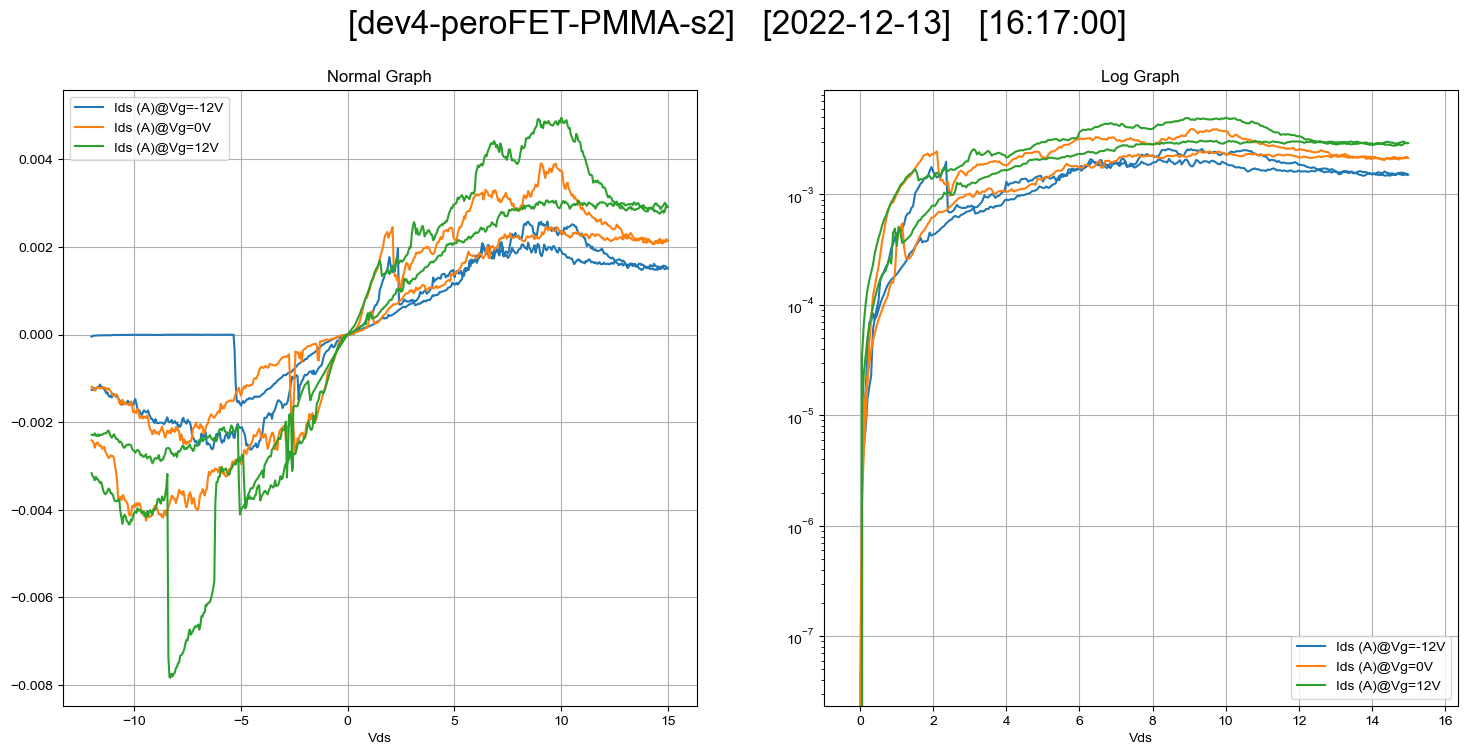

In [7]:
arkeoplot(file_name)